# Chapitre 1: rappel python

## Importation des données

In [320]:
from datetime import date

from folium import Map, CircleMarker, LayerControl
from folium.plugins import MarkerCluster, FeatureGroupSubGroup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [196]:
df_exist = pd.read_csv("data/dpe-v2-logements-existants.csv")
df_neufs = pd.read_csv("data/dpe-v2-logements-neufs.csv")

C:\Users\axel-\AppData\Local\Temp\ipykernel_51464\2409033445.py:1: DtypeWarning: Columns (12,48,190,191,192,193) have mixed types. Specify dtype option on import or set low_memory=False.
  df_exist = pd.read_csv("data/dpe-v2-logements-existants.csv")


In [197]:
# affichage dimensions
df_exist.shape

(16069, 242)

In [198]:
df_neufs.shape

(2851, 220)

In [199]:
# Création de la colonne ancien ou neuf
df_exist["Logement"] = "ancien"
df_neufs["Logement"] = "neuf"

In [200]:
# Création de la colonne année en cours
df_neufs["Année_construction"] = date.today().year

In [201]:
# fusionner les deux dataframes (utilisation de inner pour éliminer les colonnes qui ne sont pas communes).
df = pd.concat([df_exist, df_neufs], join="inner")

# Défragmenter le dataframe.
df = df.copy()

# Réinitialiser les index.
df.reset_index(inplace=True)

In [202]:
# Création de la colonne avec l'année de  Date_réception_DPE
df["Année réception"] = df["Date_réception_DPE"]

In [203]:
# Verification du cout total
df["check_cout_total"] = df["Coût_total_5_usages"] == (df["Coût_chauffage"] + df["Coût_éclairage"] + df["Coût_ECS"] + df["Coût_refroidissement"] + df["Coût_auxiliaires"])

In [204]:
df["check_cout_total"].value_counts()

check_cout_total
False    12108
True      6812
Name: count, dtype: int64

In [205]:
# Créer une colonne Coût chauffage en % qui est la part du coût du chauffage dans le coût total 5 usages.
df["Coût chauffage en %"] = df["Coût_chauffage"] / df["Coût_total_5_usages"]

In [206]:
# Creer une colonne qui vérifie si Coût_total_5_usages correpoond bien à la somme du Coût_chauffage + Coût_éclairage + Coût_ECS + Coût_refroidissement + Coût_auxiliaires.

def periode_construction(x: float) -> str:

    if pd.isna(x):
        return pd.NA

    if x < 1960:
        return "Avant 1960"
    elif x < 1971:
        return "1961 - 1970"
    elif x < 1981:
        return "1971 - 1980"
    elif x < 1991:
        return "1981 - 1990"
    elif x < 2001:
        return "1991 - 2000"
    elif x < 2011:
        return "2001 - 2010"
    else:
        return "Après 2010"

In [207]:
df["Periode_construction"] = df["Année_construction"].apply(lambda x: periode_construction(x))

In [208]:
df["Periode_construction"]

0        2001 - 2010
1               <NA>
2               <NA>
3               <NA>
4               <NA>
            ...     
18915     Après 2010
18916     Après 2010
18917     Après 2010
18918     Après 2010
18919     Après 2010
Name: Periode_construction, Length: 18920, dtype: object

## Statistiques générales

In [209]:
# Calculer la répartition des logements par Etiquette_DPE
df["Etiquette_DPE"].value_counts(normalize=True)

Etiquette_DPE
C    0.395825
D    0.287051
E    0.178647
F    0.052748
B    0.051427
G    0.029123
A    0.005180
Name: proportion, dtype: float64

In [210]:
# Calculer la répartition des logements par Date_réception_DPE
df["Date_réception_DPE"].value_counts(normalize=True)

Date_réception_DPE
2022-09-19    0.032717
2023-07-31    0.017389
2023-01-13    0.017230
2022-07-06    0.016121
2023-01-27    0.011522
                ...   
2022-09-10    0.000053
2023-08-19    0.000053
2023-07-01    0.000053
2023-07-29    0.000053
2023-08-13    0.000053
Name: proportion, Length: 1059, dtype: float64

In [211]:
# Répartition par type de logement
pd.DataFrame(df["Logement"].value_counts(normalize=True))

,proportion
Logement,
ancien,0.849313
neuf,0.150687


In [212]:
df["Date_réception_DPE"].value_counts(normalize=True)

Date_réception_DPE
2022-09-19    0.032717
2023-07-31    0.017389
2023-01-13    0.017230
2022-07-06    0.016121
2023-01-27    0.011522
                ...   
2022-09-10    0.000053
2023-08-19    0.000053
2023-07-01    0.000053
2023-07-29    0.000053
2023-08-13    0.000053
Name: proportion, Length: 1059, dtype: float64

In [213]:
df["Type_bâtiment"].value_counts(normalize=True)

Type_bâtiment
appartement    0.972516
maison         0.017336
immeuble       0.010148
Name: proportion, dtype: float64

In [214]:
df["Type_installation_chauffage"].value_counts(normalize=True)

Type_installation_chauffage
individuel                      0.625310
collectif                       0.333136
mixte (collectif-individuel)    0.041554
Name: proportion, dtype: float64

In [215]:
df["Periode_construction"].value_counts(normalize=True)

Periode_construction
Après 2010     0.314357
Avant 1960     0.207267
1971 - 1980    0.107311
1991 - 2000    0.100691
1961 - 1970    0.093042
2001 - 2010    0.089217
1981 - 1990    0.088114
Name: proportion, dtype: float64

In [216]:
# Calculer la surface habitable moyenne des logements
df["Surface_habitable_logement"].mean()

np.float64(56.568295024265375)

In [217]:
df["Coût_chauffage"].mean()

np.float64(711.6565591966173)

In [218]:
df["Coût_ECS"].quantile(0.25)

np.float64(181.0)

In [219]:
df["Coût_ECS"].quantile(0.50)

np.float64(253.0)

In [220]:
df["Coût_ECS"].quantile(0.75)

np.float64(345.0)

In [221]:
# Calculer les déciles du Coût_ECS.
deciles = list()

for i in range(10):
    deciles.append(df["Coût_ECS"].quantile(i/10))

df_deciles = pd.DataFrame({
    "% deciles": [i/10 for i in range(10)],
    "deciles": deciles 
})

df_deciles.set_index("% deciles")

,deciles
% deciles,
0.0,0.0
0.1,140.6
0.2,170.6
0.3,191.5
0.4,215.5
0.5,253.0
0.6,287.4
0.7,322.7
0.8,365.4


In [222]:
# Calculer le coefficient de corrélation entre la surface habitable du logement et le coût du chauffage.
df["Surface_habitable_logement"].corr(df["Coût_chauffage"])

np.float64(0.5486576341483373)

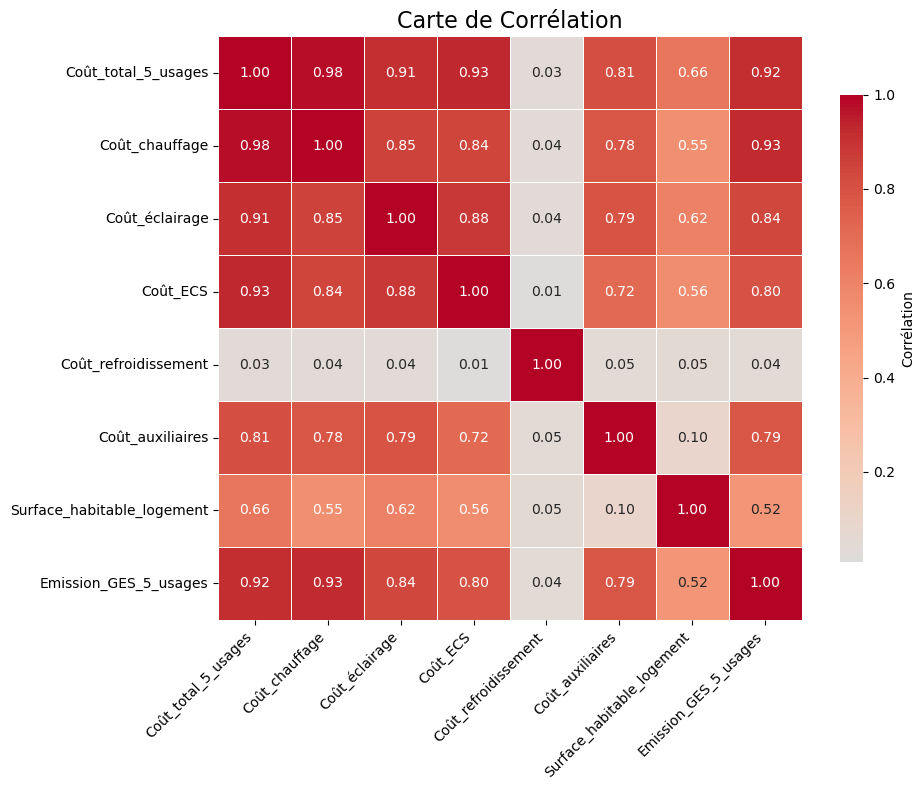

In [223]:
# Construire un corrélogramme sur ces variables (Coût_total_5_usages,Coût_chauffage,Coût_éclairage,Coût_ECS,Coût_refroidissement, Coût_auxiliaires, Surface_habitable_logement , Emission_GES_5_usages)
corr_matrix = df[["Coût_total_5_usages", "Coût_chauffage", "Coût_éclairage", "Coût_ECS", "Coût_refroidissement", "Coût_auxiliaires", "Surface_habitable_logement", "Emission_GES_5_usages"]].corr()

plt.figure(figsize=(10, 8))  # Taille de la figure

sns.heatmap(
    corr_matrix, 
    annot=True,            # Affiche les valeurs dans les cellules
    fmt=".2f",             # Format des valeurs
    cmap="coolwarm",       # Palette de couleurs
    square=True, 
    center=0, 
    linewidths=0.5,        # Lignes entre les cellules
    cbar_kws={"shrink": 0.8, "label": "Corrélation"}  # Barre de couleur
)

plt.title('Carte de Corrélation', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotation des labels x
plt.yticks(rotation=0)               # Rotation des labels y
plt.tight_layout()
plt.show()

## Filtre

In [224]:
df[df["Type_bâtiment"] == "appartement"]

,index,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,...,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Surface_totale_capteurs_photovoltaïque,Nombre_module,Logement,Année réception,check_cout_total,Coût chauffage en %,Periode_construction
0,0,2369E1626603K,2023-05-17,2023-05-16,2023-05-15,DPE 3CL 2021 méthode logement,NaN,2033-05-15,2.2,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2023-05-17,False,0.636414,2001 - 2010
1,1,2469E2448797H,2024-07-06,2024-07-05,2024-07-03,DPE 3CL 2021 méthode logement,NaN,2034-07-04,2.4,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2024-07-06,True,0.415074,<NA>
2,2,2469E1154509Z,2024-03-29,2024-03-28,2024-03-28,DPE 3CL 2021 méthode logement,NaN,2034-03-27,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2024-03-29,False,0.869773,<NA>
3,3,2269E1396880W,2022-06-22,2022-06-21,2022-06-20,DPE 3CL 2021 méthode logement,NaN,2032-06-20,2.1,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-06-22,False,0.592629,<NA>
4,4,2269E1396877T,2022-06-22,2022-06-21,2022-06-20,DPE 3CL 2021 méthode logement,NaN,2032-06-20,2.1,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-06-22,False,0.603996,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18900,2831,2469N2074360F,2024-06-11,2024-06-10,2024-05-29,DPE NEUF logement : RT2012,NaN,2034-06-09,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-06-11,True,0.453171,Après 2010
18901,2832,2469N2074176D,2024-06-11,2024-06-10,2024-05-29,DPE NEUF logement : RT2012,NaN,2034-06-09,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-06-11,False,0.441921,Après 2010
18902,2833,2469N2074603O,2024-06-11,2024-06-10,2024-05-29,DPE NEUF logement : RT2012,NaN,2034-06-09,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-06-11,False,0.474849,Après 2010
18903,2834,2469N2074538B,2024-06-11,2024-06-10,2024-05-29,DPE NEUF logement : RT2012,NaN,2034-06-09,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-06-11,True,0.432335,Après 2010


In [225]:
df[df["Etiquette_DPE"].isin(["D", "E", "F", "G"])]

,index,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,...,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Surface_totale_capteurs_photovoltaïque,Nombre_module,Logement,Année réception,check_cout_total,Coût chauffage en %,Periode_construction
2,2,2469E1154509Z,2024-03-29,2024-03-28,2024-03-28,DPE 3CL 2021 méthode logement,NaN,2034-03-27,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2024-03-29,False,0.869773,<NA>
3,3,2269E1396880W,2022-06-22,2022-06-21,2022-06-20,DPE 3CL 2021 méthode logement,NaN,2032-06-20,2.1,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-06-22,False,0.592629,<NA>
4,4,2269E1396877T,2022-06-22,2022-06-21,2022-06-20,DPE 3CL 2021 méthode logement,NaN,2032-06-20,2.1,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-06-22,False,0.603996,<NA>
5,5,2269E1917191V,2022-08-26,2022-08-25,2022-08-23,DPE 3CL 2021 méthode logement,NaN,2032-08-24,2.2,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-08-26,False,0.611404,<NA>
6,6,2369E0405327G,2023-02-07,2023-02-06,2023-02-06,DPE 3CL 2021 méthode logement,NaN,2033-02-05,2.2,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2023-02-07,False,0.516193,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18042,1973,2469N2399606R,2024-07-03,2024-07-02,2024-06-16,DPE NEUF logement : RT2012,NaN,2034-07-01,2.4,2469N2399597I,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-07-03,False,0.602711,Après 2010
18048,1979,2469N2399618D,2024-07-03,2024-07-02,2024-06-16,DPE NEUF logement : RT2012,NaN,2034-07-01,2.4,2469N2399597I,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-07-03,False,0.536678,Après 2010
18051,1982,2469N2399614Z,2024-07-03,2024-07-02,2024-06-16,DPE NEUF logement : RT2012,NaN,2034-07-01,2.4,2469N2399597I,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-07-03,False,0.479581,Après 2010
18052,1983,2469N2399597I,2024-07-03,2024-07-02,2024-06-16,DPE NEUF logement : RT2012,NaN,2034-07-01,2.4,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-07-03,False,0.534576,Après 2010


In [226]:
df[(df["Logement"] == "ancien")&(df["Periode_construction"] == "Avant 1960")]

,index,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,...,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Surface_totale_capteurs_photovoltaïque,Nombre_module,Logement,Année réception,check_cout_total,Coût chauffage en %,Periode_construction
8,8,2169E0887295K,2021-12-09,2021-12-09,2021-12-09,DPE 3CL 2021 méthode logement,NaN,2031-12-08,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2021-12-09,True,0.640931,Avant 1960
15,15,2169E0589041C,2021-10-28,2021-10-28,2021-10-28,DPE 3CL 2021 méthode logement,NaN,2031-10-27,1.1,NaN,...,1.0,Solaire Photovoltaïque,1.0,NaN,NaN,ancien,2021-10-28,False,0.588700,Avant 1960
16,16,2269E2441112Q,2022-10-19,2022-10-18,2022-08-30,DPE 3CL 2021 méthode logement,NaN,2032-10-17,2.2,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-10-19,False,0.344346,Avant 1960
116,116,2369E0282121O,2023-01-29,2023-01-28,2023-01-24,DPE 3CL 2021 méthode logement,NaN,2033-01-27,2.2,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2023-01-29,False,0.483187,Avant 1960
144,144,2369E3655915W,2023-10-27,2023-10-26,2023-10-17,DPE 3CL 2021 méthode logement,NaN,2033-10-25,2.3,2369E3655482F,...,NaN,NaN,NaN,NaN,NaN,ancien,2023-10-27,True,0.370600,Avant 1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16059,16059,2269E3211592M,2023-01-26,2022-12-29,2022-12-29,DPE 3CL 2021 méthode logement,NaN,2032-12-28,2.2,NaN,...,NaN,Solaire Photovoltaïque,0.0,NaN,NaN,ancien,2023-01-26,False,0.548831,Avant 1960
16060,16060,2369E0268106N,2023-01-27,2023-01-10,2023-01-10,DPE 3CL 2021 méthode logement,NaN,2033-01-09,2.2,NaN,...,NaN,Solaire Photovoltaïque,0.0,NaN,NaN,ancien,2023-01-27,False,0.598677,Avant 1960
16061,16061,2269E3216604G,2023-02-16,2022-12-15,2022-12-15,DPE 3CL 2021 méthode logement,2269E3183410O,2032-12-14,2.2,NaN,...,NaN,Solaire Photovoltaïque,0.0,NaN,NaN,ancien,2023-02-16,False,0.631340,Avant 1960
16063,16063,2369E2243512R,2023-07-04,2023-06-28,2023-06-28,DPE 3CL 2021 méthode logement,2369E2233410D,2033-06-27,2.3,NaN,...,NaN,Solaire Photovoltaïque,0.0,NaN,NaN,ancien,2023-07-04,True,0.935531,Avant 1960


In [227]:
df[df["Surface_habitable_logement"] > df["Surface_habitable_logement"].mean()]

,index,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,...,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Surface_totale_capteurs_photovoltaïque,Nombre_module,Logement,Année réception,check_cout_total,Coût chauffage en %,Periode_construction
0,0,2369E1626603K,2023-05-17,2023-05-16,2023-05-15,DPE 3CL 2021 méthode logement,NaN,2033-05-15,2.2,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2023-05-17,False,0.636414,2001 - 2010
2,2,2469E1154509Z,2024-03-29,2024-03-28,2024-03-28,DPE 3CL 2021 méthode logement,NaN,2034-03-27,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2024-03-29,False,0.869773,<NA>
5,5,2269E1917191V,2022-08-26,2022-08-25,2022-08-23,DPE 3CL 2021 méthode logement,NaN,2032-08-24,2.2,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-08-26,False,0.611404,<NA>
6,6,2369E0405327G,2023-02-07,2023-02-06,2023-02-06,DPE 3CL 2021 méthode logement,NaN,2033-02-05,2.2,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2023-02-07,False,0.516193,<NA>
8,8,2169E0887295K,2021-12-09,2021-12-09,2021-12-09,DPE 3CL 2021 méthode logement,NaN,2031-12-08,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2021-12-09,True,0.640931,Avant 1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18915,2846,2469N2622948T,2024-07-19,2024-07-18,2024-07-07,DPE NEUF logement : RT2012,NaN,2034-07-17,2.4,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-07-19,False,0.602694,Après 2010
18916,2847,2469N1847972Z,2024-05-27,2024-05-14,2024-05-14,DPE NEUF logement : RT2012,NaN,2034-05-13,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-05-27,False,0.624161,Après 2010
18917,2848,2469N1761971G,2024-05-20,2024-05-19,2024-05-14,DPE NEUF logement : RT2012,NaN,2034-05-18,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-05-20,False,0.652582,Après 2010
18918,2849,2469N2286221S,2024-06-25,2024-05-19,2024-05-14,DPE NEUF logement : RT2012,NaN,2034-05-18,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-06-25,False,0.652582,Après 2010


In [228]:
df.sort_values("Conso_5_usages/m²_é_finale", ascending = False)

,index,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,...,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Surface_totale_capteurs_photovoltaïque,Nombre_module,Logement,Année réception,check_cout_total,Coût chauffage en %,Periode_construction
3323,3323,2469E1890439Z,2024-05-29,2024-04-09,2024-04-09,DPE 3CL 2021 méthode logement,NaN,2034-04-08,2.3,2469E1543254S,...,NaN,Solaire Photovoltaïque,0.0,NaN,NaN,ancien,2024-05-29,False,0.518643,Avant 1960
8575,8575,2169E0807345K,2021-11-30,2021-11-23,2021-10-04,DPE 3CL 2021 méthode logement,NaN,2031-11-22,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2021-11-30,True,0.322833,1971 - 1980
15909,15909,2169E0588245M,2021-10-28,2021-10-28,2021-10-28,DPE 3CL 2021 méthode logement,NaN,2031-10-27,1.1,NaN,...,1.0,Solaire Photovoltaïque,1.0,NaN,NaN,ancien,2021-10-28,False,0.639736,Avant 1960
2363,2363,2369E1131231Q,2023-04-05,2023-04-04,2023-03-07,DPE 3CL 2021 méthode logement,NaN,2033-04-03,2.2,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2023-04-05,True,0.690271,<NA>
8577,8577,2169E0199254H,2021-08-21,2021-08-21,2021-07-27,DPE 3CL 2021 méthode logement,NaN,2031-08-20,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2021-08-21,True,0.561446,Avant 1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17459,1390,2369N1889414W,2023-06-07,2023-06-05,2023-05-09,DPE NEUF logement : RT2012,NaN,2033-06-04,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2023-06-07,False,0.290593,Après 2010
8243,8243,2169E0731222P,2021-11-20,2021-11-20,2021-11-20,DPE 3CL 2021 méthode logement,NaN,2031-11-19,1.1,NaN,...,0.0,Eolien + Cogénération,0.0,NaN,NaN,ancien,2021-11-20,False,0.138614,1961 - 1970
17447,1378,2369N1889405N,2023-06-07,2023-06-05,2023-05-09,DPE NEUF logement : RT2012,NaN,2033-06-04,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2023-06-07,False,0.233925,Après 2010
17152,1083,2369N1243296E,2023-04-14,2023-04-11,2023-04-11,DPE NEUF logement : RT2012,NaN,2033-04-10,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2023-04-14,False,0.717296,Après 2010


In [229]:
df.sort_values(by=["Etiquette_DPE", "Periode_construction", "Coût_chauffage"], ascending = [True, True, False])

,index,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,...,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Surface_totale_capteurs_photovoltaïque,Nombre_module,Logement,Année réception,check_cout_total,Coût chauffage en %,Periode_construction
18907,2838,2269N1758937M,2022-08-01,2022-07-31,2022-07-25,DPE NEUF logement : RT2012,NaN,2032-07-30,2.1,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2022-08-01,False,0.696099,Après 2010
18912,2843,2469N2695941E,2024-07-25,2024-07-24,2024-07-07,DPE NEUF logement : RT2012,NaN,2034-07-23,2.4,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-07-25,False,0.620178,Après 2010
18917,2848,2469N1761971G,2024-05-20,2024-05-19,2024-05-14,DPE NEUF logement : RT2012,NaN,2034-05-18,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-05-20,False,0.652582,Après 2010
18918,2849,2469N2286221S,2024-06-25,2024-05-19,2024-05-14,DPE NEUF logement : RT2012,NaN,2034-05-18,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-06-25,False,0.652582,Après 2010
18913,2844,2469N1697969Q,2024-05-14,2024-05-13,2024-05-02,DPE NEUF logement : RT2012,NaN,2034-05-12,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-05-14,False,0.644588,Après 2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5366,5366,2269E1336140S,2022-06-16,2022-06-15,2022-06-14,DPE 3CL 2021 méthode logement,NaN,2032-06-14,2.1,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-06-16,False,0.489037,<NA>
4457,4457,2469E0523860G,2024-02-14,2024-02-13,2021-11-11,DPE 3CL 2021 méthode logement,NaN,2034-02-12,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2024-02-14,False,0.429564,<NA>
4639,4639,2469E0531266C,2024-02-14,2024-02-13,2021-11-11,DPE 3CL 2021 méthode logement,NaN,2034-02-12,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2024-02-14,False,0.429564,<NA>
9062,9062,2269E2280701Z,2022-10-03,2022-10-02,2022-10-02,DPE 3CL 2021 méthode logement,NaN,2032-10-01,2.2,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-10-03,False,0.358004,<NA>


## Agrégation

In [230]:
# Calculer le coût moyen du chauffage selon l'étiquette du DPE.
df.groupby(by="Etiquette_DPE")["Coût_chauffage"].mean()

df.groupby(by="Etiquette_DPE").agg({
    "Coût_chauffage": "mean"
})

,Coût_chauffage
Etiquette_DPE,
A,193.414286
B,170.926413
C,502.142449
D,718.573301
E,1049.023521
F,1298.834669
G,1405.123775


In [231]:
df.groupby(by="Periode_construction")["Coût_total_5_usages"].mean()

Periode_construction
1961 - 1970    1680.073439
1971 - 1980    2243.238588
1981 - 1990    1621.043740
1991 - 2000    1181.871585
2001 - 2010     927.770816
Après 2010      635.812003
Avant 1960     1528.047303
Name: Coût_total_5_usages, dtype: float64

In [232]:
df.groupby(by=["Logement", "Etiquette_DPE"])["Coût_total_5_usages"].mean()

Logement  Etiquette_DPE
ancien    A                1101.340000
          B                 525.395775
          C                1136.833733
          D                1255.664863
          E                1603.122301
          F                1803.781363
          G                1841.800544
neuf      A                 390.791398
          B                 427.229844
          C                 675.917227
          D                1205.633333
          E                1048.300000
Name: Coût_total_5_usages, dtype: float64

## Création de graphique

<Axes: >

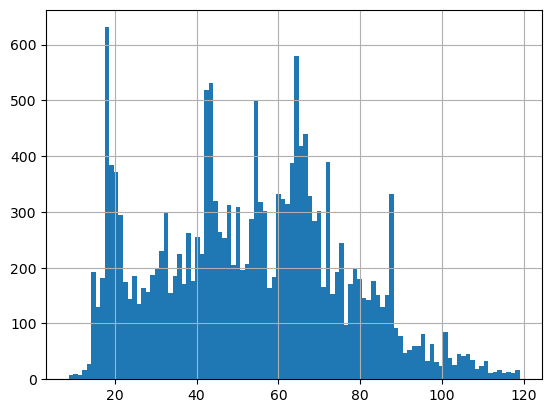

In [233]:
# Construire une histogramme de la distribution des surfaces habitables

# Suppression des outliers par la méthode interquartile
Q1 = df["Surface_habitable_logement"].quantile(0.25)
Q3 = df["Surface_habitable_logement"].quantile(0.75)
IQR = Q3 -Q1

borne_inf = Q1 - (1.5 * IQR)
borne_sup = Q3 + (1.5 * IQR)

surface_without_outliers = df[
    (df["Surface_habitable_logement"] < borne_sup)
    & (df["Surface_habitable_logement"] > borne_inf)
    ].loc[:,"Surface_habitable_logement"]


surface_without_outliers.hist(bins=100)

<Axes: >

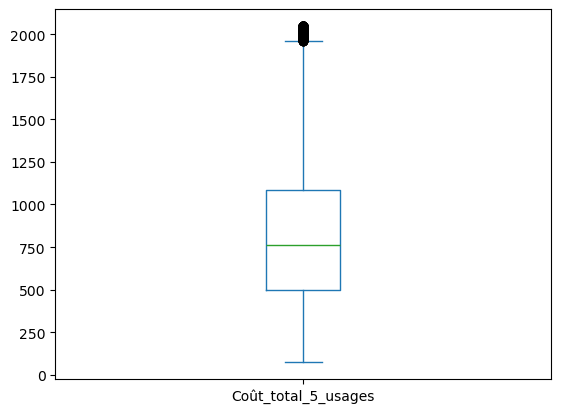

In [234]:
# Suppression des outliers par la méthode interquartile

cout_total = df["Coût_total_5_usages"]

Q1 = cout_total.quantile(0.25)
Q3 = cout_total.quantile(0.75)
IQR = Q3 -Q1

borne_inf = Q1 - (1.5 * IQR)
borne_sup = Q3 + (1.5 * IQR)

cout_total = cout_total[(cout_total < borne_sup)
                        & (cout_total > borne_inf)]


cout_total.plot(kind="box")

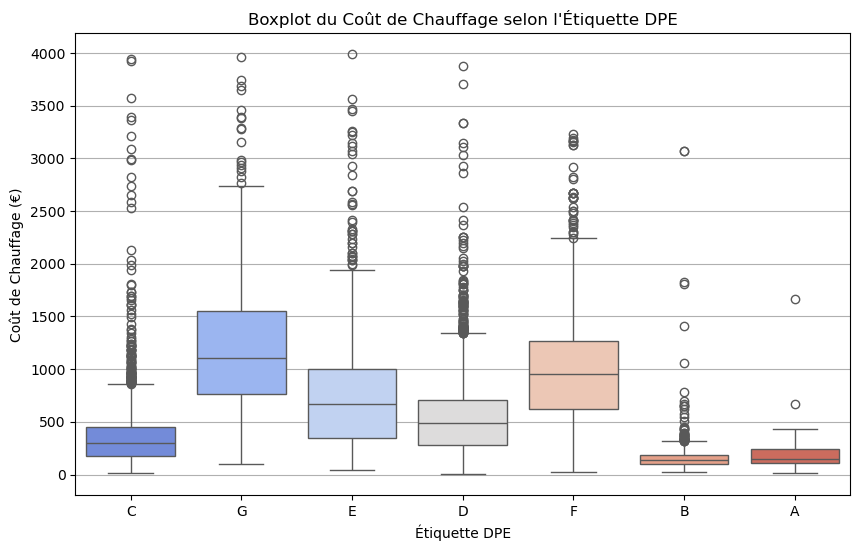

In [235]:
# Construire un boxplot avec le coût du chauffage selon le type d'étiquette DPE
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df["Coût_chauffage"] < 4000], x='Etiquette_DPE', y='Coût_chauffage', hue='Etiquette_DPE', palette='coolwarm')
plt.title("Boxplot du Coût de Chauffage selon l'Étiquette DPE")
plt.xlabel("Étiquette DPE")
plt.ylabel("Coût de Chauffage (€)")
plt.grid(True, axis='y')
plt.show()

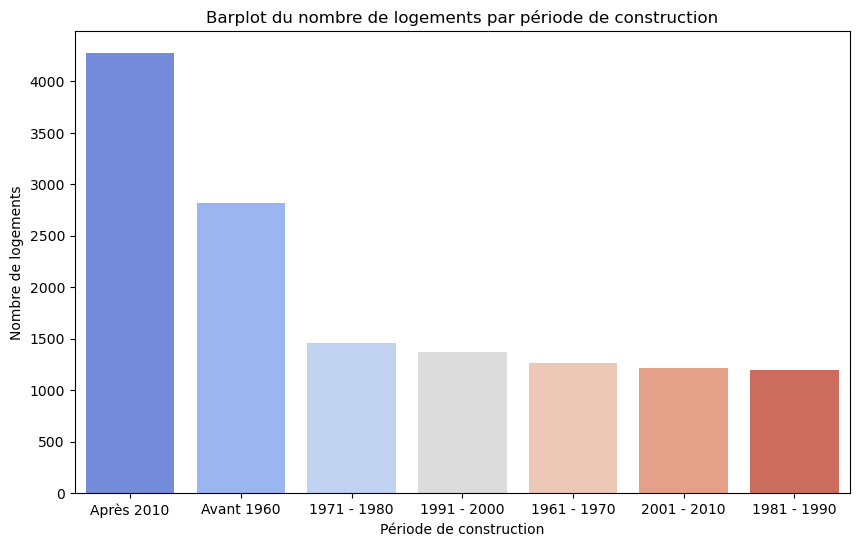

In [236]:
# Construire un diagramme en barre du nombre de logements par période de construction
periode_freq = df["Periode_construction"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=periode_freq.index,
    y=periode_freq.values,
    hue=periode_freq.index,  
    palette="coolwarm"
)
plt.title("Barplot du nombre de logements par période de construction")
plt.xlabel("Période de construction")
plt.ylabel("Nombre de logements")
plt.show()

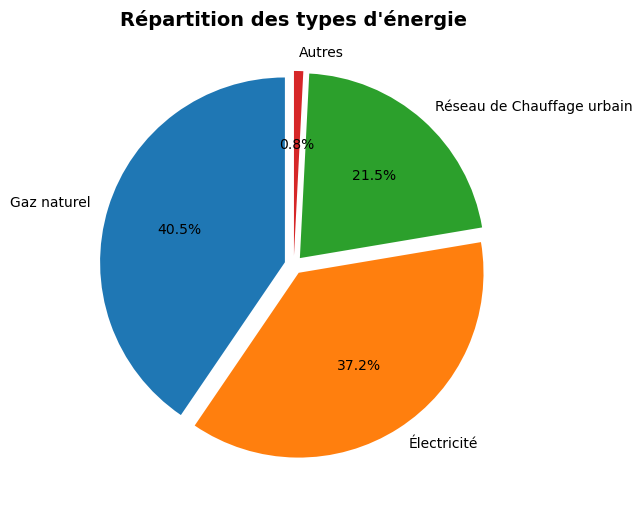

In [239]:
# Construire un diagramme circulaire du principal type d'énergie (Type_énergie_n.1)

# Concaténation des groupes > 6% dans un seul groupe 'autre'.
counts = df["Type_énergie_n°1"].value_counts()
threshold = 0.05 * counts.sum()   # seuil de 5%
counts = counts.apply(lambda x: x if x > threshold else 0)  # Mettre à 0 les valeurs inférieures au seuil
counts["Autres"] = (df["Type_énergie_n°1"].value_counts() - counts).sum()  # Soustraire toute les autres valeurs pour ne sommer que celle < seuil.
counts = counts[counts > 0]  # Supprimer les valeurs == 0.


plt.figure(figsize=(6,6))

counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,   # Rotation du pieplot.
    explode=[0.05]*counts.nunique()
)

plt.ylabel("")
plt.title("Répartition des types d'énergie", fontsize=14, weight="bold")
plt.show()

# Regression linéaire simple

In [264]:
df_regression = df.loc[:, ["Surface_habitable_logement", "Coût_chauffage"]]

In [265]:
df_regression

,Surface_habitable_logement,Coût_chauffage
0,93.6,694.2
1,32.8,267.1
2,78.0,2417.1
3,27.8,426.1
4,27.6,399.0
...,...,...
18915,90.6,358.0
18916,139.3,372.0
18917,152.5,417.0
18918,152.5,417.0


In [273]:
# Supression des outliers (méthode interquartile).
df_regression = df.loc[:, ["Surface_habitable_logement", "Coût_chauffage"]]

IQR_surface = df_regression["Surface_habitable_logement"].quantile(0.75) - df_regression["Surface_habitable_logement"].quantile(0.25)
IQR_cout = df_regression["Coût_chauffage"].quantile(0.75) - df_regression["Coût_chauffage"].quantile(0.25)

borne_inf_surface = df_regression["Surface_habitable_logement"].quantile(0.25) - (1.5 * IQR_surface)
borne_sup_surface = df_regression["Surface_habitable_logement"].quantile(0.75) + (1.5 * IQR_surface)

borne_inf_cout = df_regression["Coût_chauffage"].quantile(0.25) - (1.5 * IQR_cout)
borne_sup_cout = df_regression["Coût_chauffage"].quantile(0.75) + (1.5 * IQR_cout)

# Récupération des données sans outliers.
df_regression = df_regression[(df_regression["Surface_habitable_logement"] < borne_sup_surface)
                        & (df_regression["Surface_habitable_logement"] > borne_inf_surface)]

df_regression = df_regression[(df_regression["Coût_chauffage"] < borne_sup_cout)
                        & (df_regression["Coût_chauffage"] > borne_inf_cout)]

Text(0.5, 1.0, 'Surface habitable vs coût chauffage')

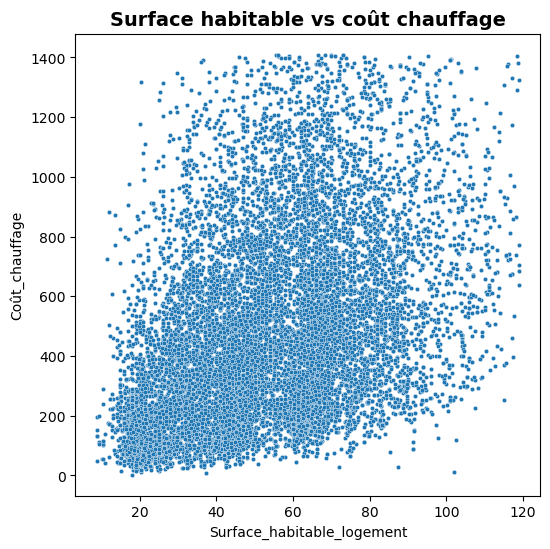

In [274]:
# Construire une nuage de point entre la surface habitable du logement et le coût du chauffage
plt.figure(figsize=(6,6))

sns.scatterplot(x=df_regression["Surface_habitable_logement"], y=df_regression["Coût_chauffage"], s=10)

plt.title("Surface habitable vs coût chauffage", fontsize=14, weight="bold")

In [275]:
# Calculer le coefficient de corrélation entre la surface habitable du logement et le coût du chauffage.
df_regression["Surface_habitable_logement"].corr(df_regression["Coût_chauffage"])

np.float64(0.4946976525603489)

In [ ]:
# Import des librairies
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Séparation de la variable explicative de la variable cible.
X = df_regression[["Surface_habitable_logement"]] # Dataframe à 1 colonne pour SciKit learn.
y = df_regression["Coût_chauffage"]

# Génération du set d'apprentissage et de test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)  # Set de test: 30% des données.

In [ ]:
# Génération de la regression linéaire simple.
reg = LinearRegression()

# Apprentissage du modèle.
reg.fit(X_train, y_train)

# Prédiction et évaluation du modèle.
y_pred = reg.predict(X_test)

# Evaluation du modèle
pd.DataFrame({
    "Pente": [reg.coef_[0]],
    "Intercept": [reg.intercept_],
    "MSE": [mean_squared_error(y_test, y_pred)],
    "R²": [r2_score(y_test, y_pred)]
}).transpose()

,0
Pente,6.957351
Intercept,93.713482
MSE,74189.185904
R²,0.242819


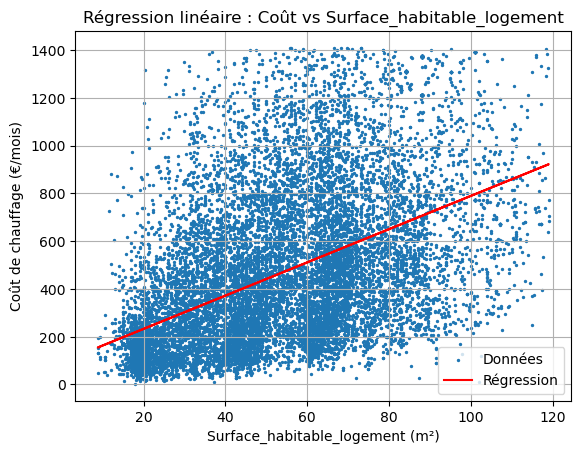

In [292]:
# Nuage de points
plt.scatter(X, y, label='Données', s=2)

# Droite de régression
plt.plot(X, reg.predict(X), color='red', label='Régression')

# Mise en forme
plt.xlabel('Surface_habitable_logement (m²)')
plt.ylabel('Coût de chauffage (€/mois)')
plt.title('Régression linéaire : Coût vs Surface_habitable_logement')
plt.legend()
plt.grid(True)
plt.show()

## Cartographie

In [294]:
# Lecture du fichier d'adresse.
df_adr = pd.read_csv("data/adresses-69.csv", sep=";")

C:\Users\axel-\AppData\Local\Temp\ipykernel_51464\242576310.py:2: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_adr = pd.read_csv("data/adresses-69.csv", sep=";")


In [295]:
df

,index,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,...,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Surface_totale_capteurs_photovoltaïque,Nombre_module,Logement,Année réception,check_cout_total,Coût chauffage en %,Periode_construction
0,0,2369E1626603K,2023-05-17,2023-05-16,2023-05-15,DPE 3CL 2021 méthode logement,NaN,2033-05-15,2.2,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2023-05-17,False,0.636414,2001 - 2010
1,1,2469E2448797H,2024-07-06,2024-07-05,2024-07-03,DPE 3CL 2021 méthode logement,NaN,2034-07-04,2.4,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2024-07-06,True,0.415074,<NA>
2,2,2469E1154509Z,2024-03-29,2024-03-28,2024-03-28,DPE 3CL 2021 méthode logement,NaN,2034-03-27,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2024-03-29,False,0.869773,<NA>
3,3,2269E1396880W,2022-06-22,2022-06-21,2022-06-20,DPE 3CL 2021 méthode logement,NaN,2032-06-20,2.1,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-06-22,False,0.592629,<NA>
4,4,2269E1396877T,2022-06-22,2022-06-21,2022-06-20,DPE 3CL 2021 méthode logement,NaN,2032-06-20,2.1,NaN,...,NaN,NaN,NaN,NaN,NaN,ancien,2022-06-22,False,0.603996,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18915,2846,2469N2622948T,2024-07-19,2024-07-18,2024-07-07,DPE NEUF logement : RT2012,NaN,2034-07-17,2.4,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-07-19,False,0.602694,Après 2010
18916,2847,2469N1847972Z,2024-05-27,2024-05-14,2024-05-14,DPE NEUF logement : RT2012,NaN,2034-05-13,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-05-27,False,0.624161,Après 2010
18917,2848,2469N1761971G,2024-05-20,2024-05-19,2024-05-14,DPE NEUF logement : RT2012,NaN,2034-05-18,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-05-20,False,0.652582,Après 2010
18918,2849,2469N2286221S,2024-06-25,2024-05-19,2024-05-14,DPE NEUF logement : RT2012,NaN,2034-05-18,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,neuf,2024-06-25,False,0.652582,Après 2010


In [296]:
# Réaliser une jointure sur le champ Identifiant__BAN pour ajouter les coordonnées GPS (lattitude / longitude) au dataframe initial
df = df.merge(df_adr, left_on="Identifiant__BAN", right_on="id", how="inner")

In [301]:
# isoler les colonnes voulues.
df_map = df.loc[:, ["Etiquette_DPE", "Année_construction", "Type_bâtiment", "Type_installation_chauffage", "lon", "lat", "Surface_habitable_logement"]]

In [321]:
# Centre de la carte
centre = [df_map['lat'].mean(), df_map['lon'].mean()]
m = Map(location=centre, zoom_start=12)

# Création du cluster principal
cluster = MarkerCluster().add_to(m)

# Couleurs DPE
couleurs_dpe = {
    'A': 'green',
    'B': 'lime',
    'C': 'yellow',
    'D': 'orange',
    'E': 'red',
    'F': 'darkred',
    'G': 'black'
}

# Créer un sous-groupe pour chaque DPE
subgroup = {}
for dpe, couleur in couleurs_dpe.items():
    subgroup[dpe] = FeatureGroupSubGroup(cluster, name=f"DPE {dpe}")
    m.add_child(subgroup[dpe])

# Ajouter les points aux sous-groupes
for _, row in df_map.iterrows():
    couleur = couleurs_dpe.get(row['Etiquette_DPE'], 'gray')
    fg = subgroup.get(row['Etiquette_DPE'])
    if fg:
        CircleMarker(
            location=[row['lat'], row['lon']],
            popup=row['Etiquette_DPE'],
            color=couleur,
            fill=True,
            fill_color=couleur,
            fill_opacity=0.8,
            radius=5
        ).add_to(fg)

# Menu pour filtrer les DPE
LayerControl(collapsed=False).add_to(m)

In [ ]:
# Exporter la map.
m.save("map.html")